<a href="https://colab.research.google.com/github/manabukosaka/sample_code/blob/master/notebook/init_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
ls

sample_data/


In [0]:
#
!pip install torch
!pip install torchvision
!pip install numpy
!pip install matplotlib
!pip install pillow
!pip install opencv-python

    100% |████████████████████████████████| 2.0MB 14.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
from google.colab import drive
drive.mount('/content/gdirve')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdirve


In [0]:
%cd /content/gdirve/My Drive/Colab Notebooks/

/content/gdirve/My Drive/Colab Notebooks


In [0]:
ls

init.ipynb


In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
files.download('init.ipynb')

In [0]:
import torch
torch.cuda.is_available()

True

In [0]:
from torch import nn


In [0]:
import torch

#requires_grad=Falseにするとパラメータ固定
x = torch.tensor(1, requires_grad=True, dtype=torch.float32)
w = torch.tensor(2, requires_grad=True, dtype=torch.float32)
b = torch.tensor(3, requires_grad=True, dtype=torch.float32)

y = w * x + b # y = 2 * 1 + 3

print(y)

tensor(5., grad_fn=<AddBackward0>)


In [0]:
#勾配計算
print(y.backward())

#勾配確認
print(x.grad)
print(w.grad)
print(b.grad)

None
tensor(2.)
tensor(1.)
tensor(1.)


In [0]:
import torchvision
from torchvision import models
net = torchvision.models.vgg16(pretrained=True)
for param in net.features.parameters():
  param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:10<00:00, 51427072.46it/s]


In [0]:
xf_gpu = torch.FloatTensor(1, 2).to('cuda')

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5)
    self.conv2 = nn.Conv2d(20, 20, 5)
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    return F.relu(self.conv2(x))
  
  
net = Model()
net.to('cuda')
    

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)

In [0]:
#MSELoss
x = torch.randn(4)
y = torch.randn(4)
criterion = nn.MSELoss()
loss  = criterion(x, y)
print(loss)

tensor(1.3346)


In [0]:
#crossEntropyLoss
x = torch.randn(1, 4)
y = torch.LongTensor([1]).random_(4)
criterion = nn.CrossEntropyLoss()
loss = criterion(x, y)
print(loss)

tensor(1.7985)


In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    #nn.Linear(input_demension, output_demension)
    self.lin1 = nn.Linear(in_features=10, out_features=10, bias=False)
  
  def forward(self, x):
    x = self.lin1(x)
    return x

In [0]:
from torch import optim
def main(opt_conf):
  print(opt_conf)
  loss_list = []
  # make data
  x = torch.randn(1, 10)
  w = torch.randn(1, 1)
  y = torch.mul(w, x) + 2
  
  #define network
  net = Net()
  
  #loss function
  criterion = nn.MSELoss()
  #optimaiztion function
  if opt_conf == 'sgd':
    optimizer = optim.SGD(net.parameters(), lr=0.1)
  elif opt_conf == 'momentum_sgd':
    optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
  elif opt_conf == 'adadelta':
    optimizer = optim.Adadelta(net.parameters(), rho=0.95, eps=1e-04)
  elif opt_conf == 'adagrad':
    optimizer = optim.Adagrad(net.parameters())
  elif opt_conf == 'adam':
    optimizer = optim.Adam(net.parameters(), lr=1e-1, betas=(0.9, 0.99), eps=1e-09)
  elif opt_conf == 'rmsprop':
    optimizer = optim.RMSprop(net.parameters())

#learning
  for epoch in range(20):
    optimizer.zero_grad()
    y_pred = net(x)
    
    loss = criterion(y_pred, y)
    loss.backward()
    
    optimizer.step()
    
    loss_list.append(loss.data.item())
    
  return loss_list

sgd
momentum_sgd
adadelta
adam
rmsprop


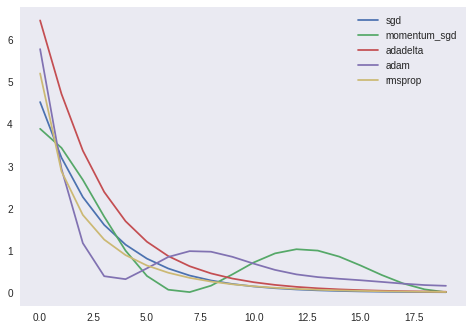

In [0]:
from matplotlib import pyplot as plt

#optimizer function
loss_dict = {}
loss_dict['sgd'] = []
loss_dict['momentum_sgd'] = []
loss_dict['adadelta'] = []
loss_dict['adam'] = []
loss_dict['rmsprop'] = []


for key, value in loss_dict.items():
  loss_dict[key] = main(key)

  
plt.figure()
plt.plot(loss_dict['sgd'], label='sgd')
plt.plot(loss_dict['momentum_sgd'], label='momentum_sgd')
plt.plot(loss_dict['adadelta'], label='adadelta')
plt.plot(loss_dict['adam'], label='adam')
plt.plot(loss_dict['rmsprop'], label='rmsprop')
plt.legend()
plt.grid()